In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import re

In [2]:
datapath = '../UniversityCases/'

### Import and Clean Data

In [3]:
fnames = sorted(glob.glob(datapath+'*.csv'))
frames = []
for f in fnames:
    m = re.search(r'[^0-9]*([0-9][0-9_]+)[^0-9]*', f)
    df = pd.read_csv(f)
    df['Date'] = pd.to_datetime(m.group(1), format='%m_%d_%y')
    df.drop(['Unnamed: 0'], axis = 1, inplace=True)
    df['Cases'] = df['Cases'].apply(lambda x: x.replace(',', '')).astype('int')
    frames.append(df)
frames[0]

,School,Cases,County_Active_Cases,County_Total_Cases,City,County,State,Date
0,Alabama A&M University,8,6574.0,6631.0,Huntsville,Madison,Alabama,2020-09-08
1,Athens State University,2,1697.0,1715.0,Athens,Limestone,Alabama,2020-09-08
2,Auburn University*,1074,3480.0,3529.0,Auburn,Lee,Alabama,2020-09-08
3,Auburn University at Montgomery,2,7800.0,7963.0,Montgomery,Montgomery,Alabama,2020-09-08
4,Jacksonville State University,219,2571.0,2602.0,Jacksonville,Calhoun,Alabama,2020-09-08
...,...,...,...,...,...,...,...,...
1020,University of Wisconsin-Milwaukee,58,24442.0,24944.0,Milwaukee,Milwaukee,Wisconsin,2020-09-08
1021,University of Wisconsin-Parkside,1,3001.0,3065.0,Somers,Kenosha,Wisconsin,2020-09-08
1022,University of Wisconsin-Whitewater,18,56.0,56.0,Whitewater,Walworth,Wisconsin,2020-09-08
1023,Eastern Wyoming College,1,66.0,67.0,Torrington,Goshen,Wyoming,2020-09-08


In [4]:
df = pd.concat(frames)
df.index = pd.MultiIndex.from_frame(df[['School', 'Date']])
df.drop(['School', 'Date'], axis = 1, inplace = True)

In [5]:
df

,,Cases,County_Active_Cases,County_Total_Cases,City,County,State
School,Date,,,,,,
Alabama A&M University,2020-09-08,8,6574.0,6631.0,Huntsville,Madison,Alabama
Athens State University,2020-09-08,2,1697.0,1715.0,Athens,Limestone,Alabama
Auburn University*,2020-09-08,1074,3480.0,3529.0,Auburn,Lee,Alabama
Auburn University at Montgomery,2020-09-08,2,7800.0,7963.0,Montgomery,Montgomery,Alabama
Jacksonville State University,2020-09-08,219,2571.0,2602.0,Jacksonville,Calhoun,Alabama
...,...,...,...,...,...,...,...
Wisconsin Lutheran College,2020-11-12,34,NaN,NaN,Milwaukee,NaN,Wisconsin
Casper College,2020-11-12,185,NaN,NaN,Casper,NaN,Wyoming
Eastern Wyoming College,2020-11-12,6,NaN,NaN,Torrington,NaN,Wyoming


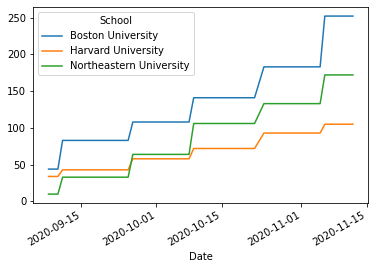

In [6]:
df.loc[(['Harvard University', 'Northeastern University', 'Boston University'],)]['Cases'].unstack().T.plot()

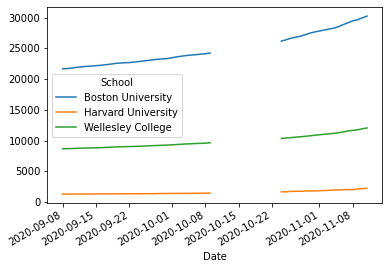

In [7]:
df.loc[(['Harvard University', 'Wellesley College','Boston University'],)]['County_Active_Cases'].unstack().T.plot()